# Telco Customer Churn - Exploratory Data Analysis (EDA)

## Purpose and Objectives

This notebook performs comprehensive exploratory data analysis on the Telco Customer Churn dataset to:

- **Understand data structure and quality**: Examine dataset dimensions, data types, and identify missing values
- **Analyze target variable distribution**: Understand churn patterns and class imbalance
- **Explore feature relationships**: Identify correlations and patterns between features and churn
- **Generate actionable insights**: Discover key factors that influence customer churn
- **Inform feature engineering**: Guide preprocessing and feature selection for model development

## Dataset Description

The Telco Customer Churn dataset contains information about:
- **Customer demographics**: Gender, age (SeniorCitizen), family status
- **Services subscribed**: Phone, internet, streaming services, security features
- **Account information**: Contract type, payment method, tenure, charges
- **Target variable**: Churn (whether customer left in the last month)

This analysis will help identify the most significant predictors of customer churn to build an effective retention strategy.

## Import Required Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path

In [43]:
# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure plot sizes
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Load and Examine Data

In [44]:
# Load the dataset
data_path = Path('../data/raw/Telco-Customer-Churn.csv')

df = pd.read_csv(data_path)
print("✅ Dataset loaded successfully!")
print(f"📈 Dataset shape: {df.shape}")
print(f"📊 Columns: {df.shape[1]}")
print(f"📋 Rows: {df.shape[0]}")

✅ Dataset loaded successfully!
📈 Dataset shape: (7043, 21)
📊 Columns: 21
📋 Rows: 7043


In [45]:
# Fix TotalCharges column - convert from object to numeric
print("🔧 Data Preprocessing:")
print(f"TotalCharges column type before: {df['TotalCharges'].dtype}")
print(f"Unique non-numeric values: {df[df['TotalCharges'] == ' ']['TotalCharges'].count()}")

# Convert TotalCharges to numeric, handling empty strings
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"TotalCharges column type after: {df['TotalCharges'].dtype}")
print(f"Missing values created: {df['TotalCharges'].isnull().sum()}")

# Display info about the conversion
if df['TotalCharges'].isnull().sum() > 0:
    print(f"⚠️  {df['TotalCharges'].isnull().sum()} customers with missing TotalCharges (likely new customers)")
else:
    print("✅ All TotalCharges values converted successfully")

🔧 Data Preprocessing:
TotalCharges column type before: object
Unique non-numeric values: 11
TotalCharges column type after: float64
Missing values created: 11
⚠️  11 customers with missing TotalCharges (likely new customers)


## Dataset Overview and Initial Inspection

In [46]:
# Display first 10 rows
print("📋 First 10 rows of the dataset:")
display(df.head(10))

📋 First 10 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.6500,820.5000,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1000,1949.4000,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.7500,301.9000,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8000,3046.0500,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.1500,3487.9500,No


In [47]:
# Dataset information and structure
print("📊 Dataset Info Summary:")
print(df.info())

📊 Dataset Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

## Data Quality Analysis

In [48]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    print("💡 Note: TotalCharges missing values were created from empty string conversions during preprocessing")
else:
    print("✅ No missing values found in the dataset!")
    
print(f"\n📊 Total missing values: {df.isnull().sum().sum()}")
print(f"📈 Dataset completeness: {((df.size - df.isnull().sum().sum()) / df.size) * 100:.2f}%")

🔍 Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
19,TotalCharges,11,0.1562


💡 Note: TotalCharges missing values were created from empty string conversions during preprocessing

📊 Total missing values: 11
📈 Dataset completeness: 99.99%


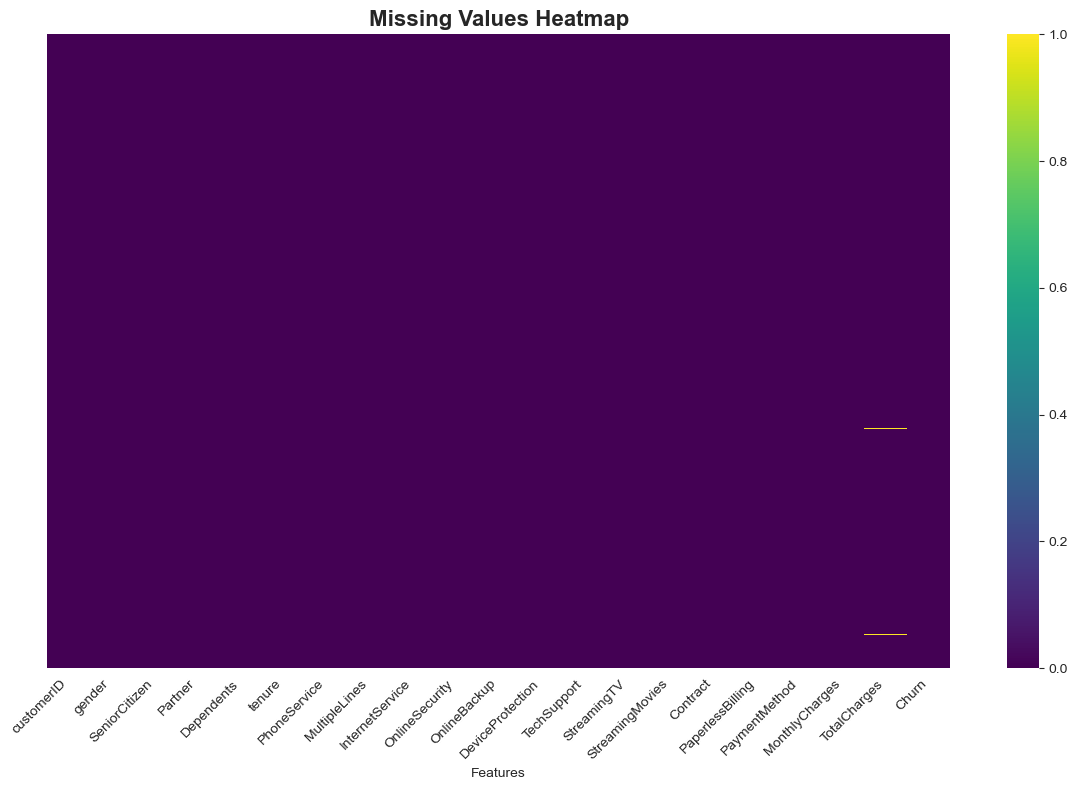

🔄 Duplicate rows: 0
✅ No duplicate rows found


In [49]:
# Create missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"🔄 Duplicate rows: {duplicates}")
if duplicates > 0:
    print("⚠️  Consider removing duplicate rows")
else:
    print("✅ No duplicate rows found")

## Target Variable Analysis

In [50]:
# Analyze target variable distribution
print("🎯 Target Variable (Churn) Analysis:")

# Churn distribution
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    'Churn': churn_counts.index,
    'Count': churn_counts.values,
    'Percentage': churn_percentage.values
})

display(churn_summary)

🎯 Target Variable (Churn) Analysis:


,Churn,Count,Percentage
0,No,5174,73.4630
1,Yes,1869,26.5370


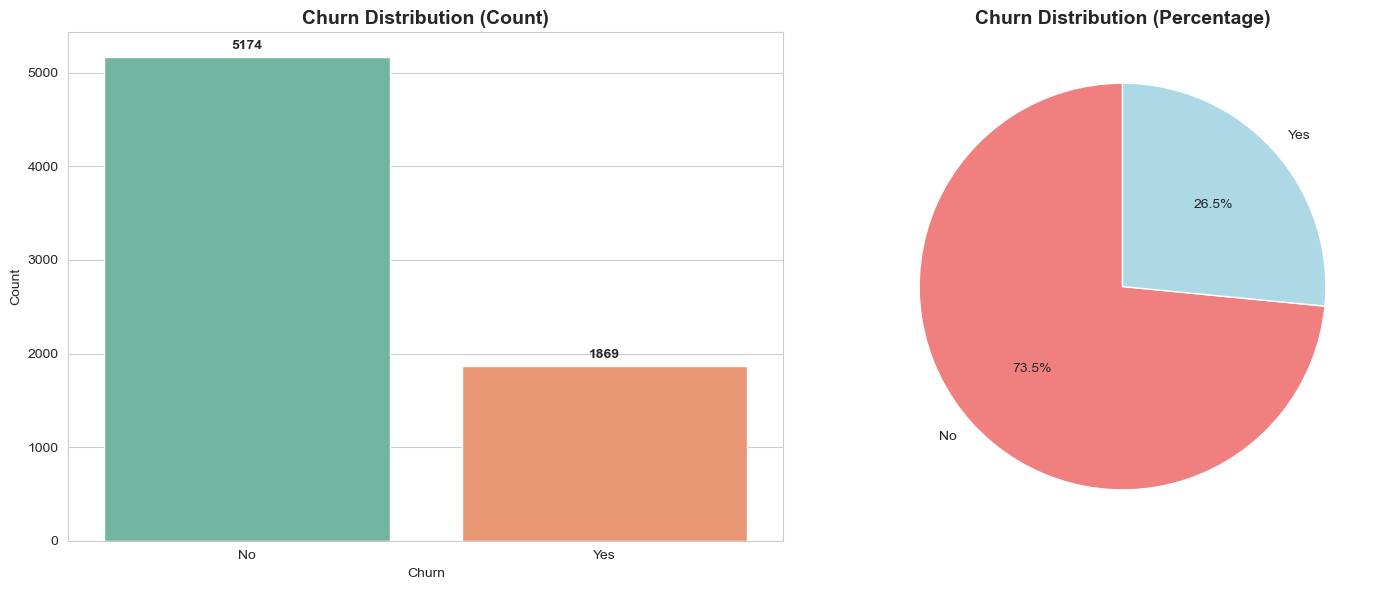

In [51]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='Churn', palette='Set2', ax=ax1)
ax1.set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')

# Add count labels on bars
for i, v in enumerate(churn_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['lightcoral', 'lightblue']
wedges, texts, autotexts = ax2.pie(churn_counts.values, labels=churn_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [52]:
# Calculate churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"📊 Overall churn rate: {churn_rate:.2f}%")

📊 Overall churn rate: 26.54%


## Statistical Summary

In [53]:
# Basic statistical summary for numerical features
print("📈 Statistical Summary of Numerical Features:")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Display descriptive statistics
numerical_stats = df[numerical_cols].describe()
display(numerical_stats)

📈 Statistical Summary of Numerical Features:
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0000,7043.0000,7043.0000,7032.0000
mean,0.1621,32.3711,64.7617,2283.3004
std,0.3686,24.5595,30.0900,2266.7714
min,0.0000,0.0000,18.2500,18.8000
25%,0.0000,9.0000,35.5000,401.4500
50%,0.0000,29.0000,70.3500,1397.4750
75%,0.0000,55.0000,89.8500,3794.7375
max,1.0000,72.0000,118.7500,8684.8000


🔗 Correlation Analysis:


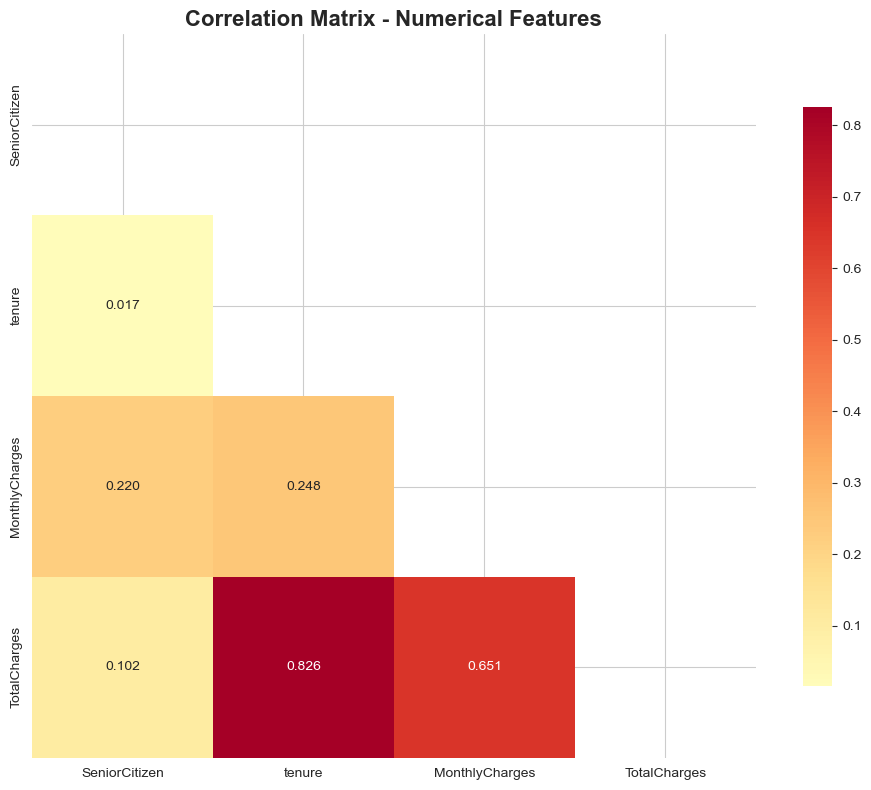


🔍 Highly Correlated Feature Pairs (|r| > 0.7):
tenure ↔ TotalCharges: 0.826


In [54]:
# Correlation analysis for numerical features
print("🔗 Correlation Analysis:")

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\n🔍 Highly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_val
            ))
            print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not high_corr_pairs:
    print("No highly correlated pairs found (threshold: |r| > 0.7)")

## Univariate Analysis

📊 All Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
📊 Meaningful Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


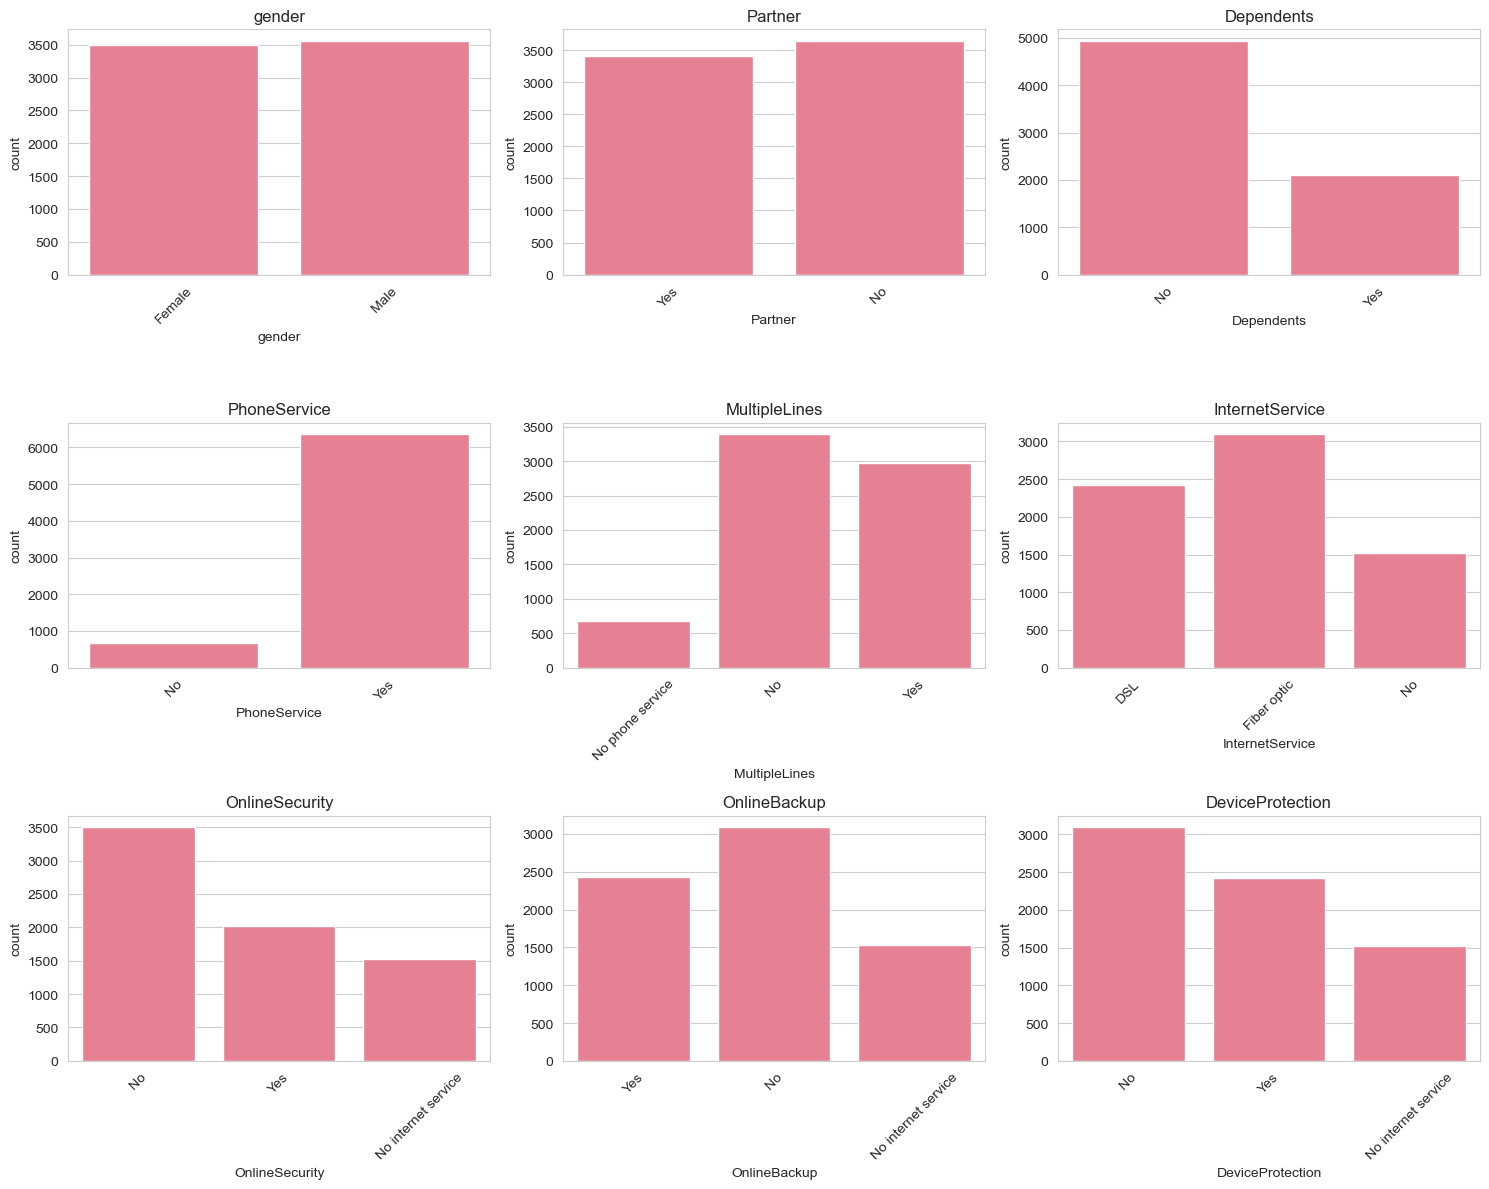

In [55]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"📊 All Categorical Features: {categorical_cols}")

# Filter out ID columns and non-meaningful categorical features
meaningful_categorical = [col for col in categorical_cols if col not in ['customerID', 'TotalCharges']]
print(f"📊 Meaningful Categorical Features: {meaningful_categorical}")

# Create simple bar plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(meaningful_categorical):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(meaningful_categorical), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

📈 Numerical Features Distribution Analysis:
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Continuous columns for detailed analysis: ['tenure', 'MonthlyCharges', 'TotalCharges']

👥 SeniorCitizen Distribution:
  Not Senior (0): 5901 (83.8%)
  Senior (1): 1142 (16.2%)


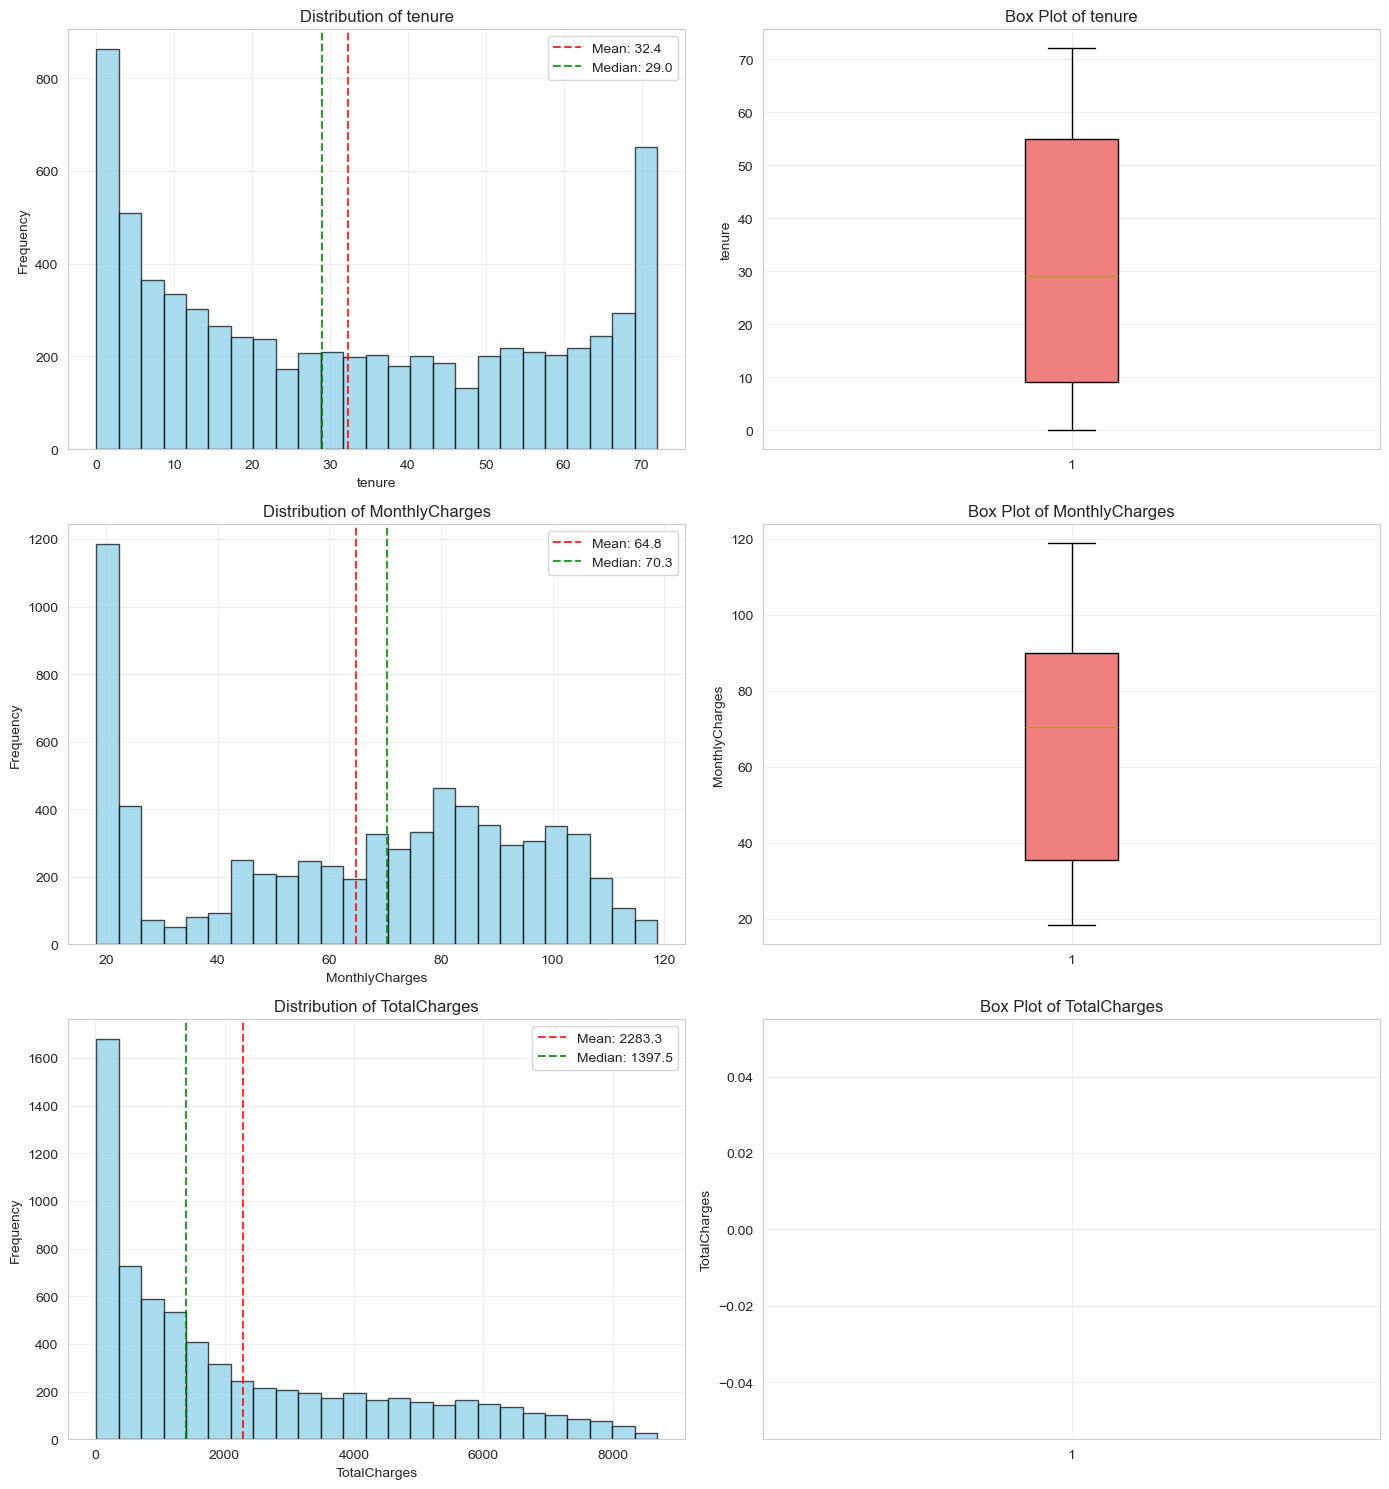

In [56]:
# Analyze numerical features with histograms and box plots
print("📈 Numerical Features Distribution Analysis:")
print(f"Numerical columns: {numerical_cols}")

# Filter out binary variables for detailed analysis
continuous_cols = [col for col in numerical_cols if col != 'SeniorCitizen']
print(f"Continuous columns for detailed analysis: {continuous_cols}")

# Handle SeniorCitizen separately (since it's binary)
print(f"\n👥 SeniorCitizen Distribution:")
senior_counts = df['SeniorCitizen'].value_counts()
print(f"  Not Senior (0): {senior_counts[0]} ({senior_counts[0]/len(df)*100:.1f}%)")
print(f"  Senior (1): {senior_counts[1]} ({senior_counts[1]/len(df)*100:.1f}%)")

# Create plots for continuous variables only
if continuous_cols:
    fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(14, 5 * len(continuous_cols)))
    
    # Handle single vs multiple columns
    if len(continuous_cols) == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(continuous_cols):
        # Histogram
        axes[i, 0].hist(df[col], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f'Distribution of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i, 0].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.1f}')
        axes[i, 0].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.1f}')
        axes[i, 0].legend()
        
        # Box plot
        bp = axes[i, 1].boxplot(df[col], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightcoral')
        axes[i, 1].set_title(f'Box Plot of {col}')
        axes[i, 1].set_ylabel(col)
        axes[i, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No continuous variables to plot.")



In [57]:
# Simple statistics summary
print("\n📊 Key Statistics:")
for col in continuous_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)][col]
    
    print(f"{col}:")
    print(f"  Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    print(f"  Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print()


📊 Key Statistics:
tenure:
  Mean: 32.37, Median: 29.00
  Range: 0.00 - 72.00
  Outliers: 0 (0.0%)

MonthlyCharges:
  Mean: 64.76, Median: 70.35
  Range: 18.25 - 118.75
  Outliers: 0 (0.0%)

TotalCharges:
  Mean: 2283.30, Median: 1397.47
  Range: 18.80 - 8684.80
  Outliers: 0 (0.0%)



## Bivariate Analysis - Churn vs Categorical Features

🎯 Churn Analysis by Categorical Features:
Analyzing 15 meaningful categorical features


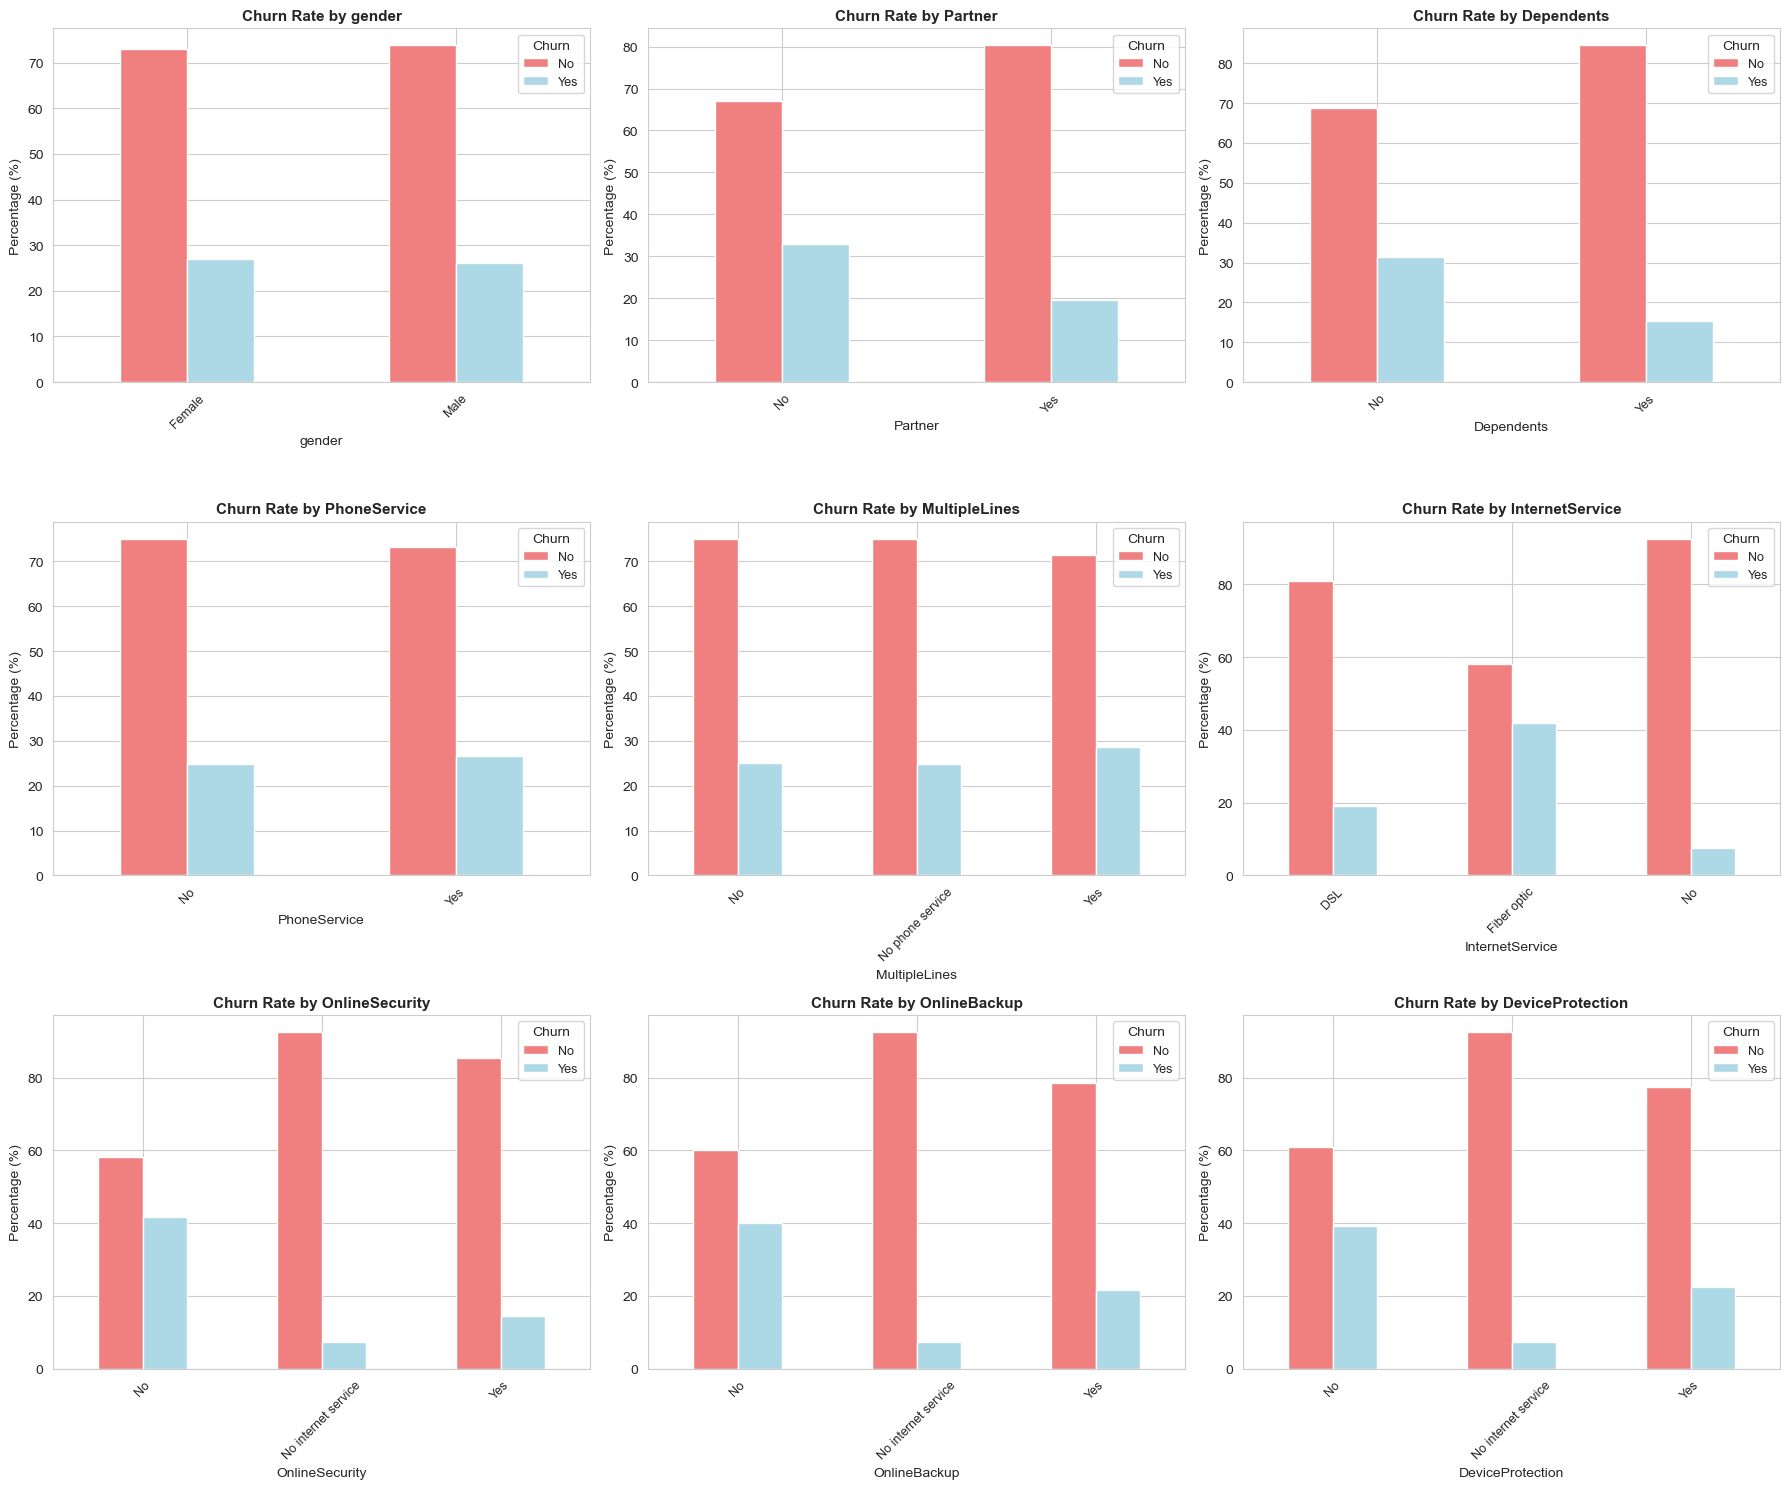

In [58]:
# Analyze churn vs categorical features with stacked bar charts
# Filter out problematic categorical features
categorical_features = [col for col in categorical_cols 
                       if col not in ['Churn', 'customerID', 'TotalCharges']]

print("🎯 Churn Analysis by Categorical Features:")
print(f"Analyzing {len(categorical_features)} meaningful categorical features")
print("="*70)

# Create a more reasonable number of plots (3x3 grid maximum)
n_cols = 3
n_rows = min(3, (len(categorical_features) + n_cols - 1) // n_cols)
features_to_plot = categorical_features[:9]  # Limit to 9 features for readability

if features_to_plot:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        # Create crosstab
        ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
        
        # Create stacked bar plot
        ct.plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightblue'])
        axes[i].set_title(f'Churn Rate by {feature}', fontweight='bold', fontsize=11)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel('Percentage (%)', fontsize=10)
        axes[i].legend(title='Churn', fontsize=9)
        axes[i].tick_params(axis='x', rotation=45, labelsize=9)

    # Hide empty subplots
    for i in range(len(features_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()



In [59]:
# Calculate and display churn rates for ALL meaningful categorical features
print("\n📊 Churn Rates by Feature (Top 3 highest rates per feature):")
print("-" * 70)
for feature in categorical_features:
    churn_by_feature = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    top_3 = churn_by_feature.sort_values(ascending=False).head(3)
    
    print(f"\n{feature}:")
    for category, rate in top_3.items():
        count = df[df[feature] == category].shape[0]
        print(f"  {category}: {rate:.1f}% ({count:,} customers)")

print(f"\n✅ Analyzed {len(categorical_features)} categorical features for churn patterns")


📊 Churn Rates by Feature (Top 3 highest rates per feature):
----------------------------------------------------------------------

gender:
  Female: 26.9% (3,488 customers)
  Male: 26.2% (3,555 customers)

Partner:
  No: 33.0% (3,641 customers)
  Yes: 19.7% (3,402 customers)

Dependents:
  No: 31.3% (4,933 customers)
  Yes: 15.5% (2,110 customers)

PhoneService:
  Yes: 26.7% (6,361 customers)
  No: 24.9% (682 customers)

MultipleLines:
  Yes: 28.6% (2,971 customers)
  No: 25.0% (3,390 customers)
  No phone service: 24.9% (682 customers)

InternetService:
  Fiber optic: 41.9% (3,096 customers)
  DSL: 19.0% (2,421 customers)
  No: 7.4% (1,526 customers)

OnlineSecurity:
  No: 41.8% (3,498 customers)
  Yes: 14.6% (2,019 customers)
  No internet service: 7.4% (1,526 customers)

OnlineBackup:
  No: 39.9% (3,088 customers)
  Yes: 21.5% (2,429 customers)
  No internet service: 7.4% (1,526 customers)

DeviceProtection:
  No: 39.1% (3,095 customers)
  Yes: 22.5% (2,422 customers)
  No interne

## Bivariate Analysis - Churn vs Numerical Features
Now let's analyze how numerical features relate to churn using box plots and statistical tests.

📊 Churn Analysis by Numerical Features:


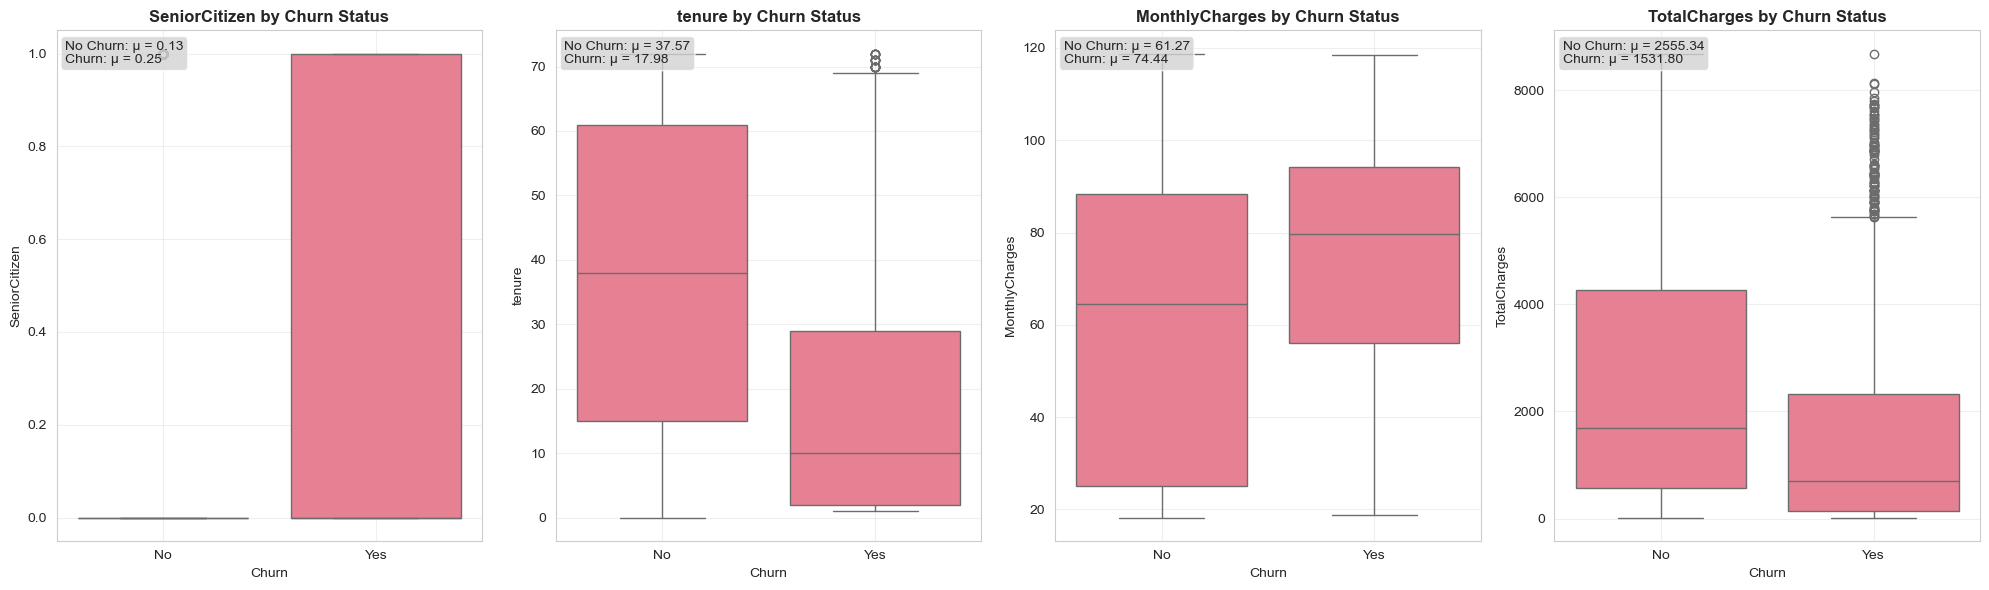


📈 Statistical Analysis (T-test for differences):
--------------------------------------------------

SeniorCitizen:
  No Churn - Mean: 0.13, Std: 0.33
  Churn - Mean: 0.25, Std: 0.44
  T-statistic: -12.808
  P-value: 0.000000
  Significant difference: Yes

tenure:
  No Churn - Mean: 37.57, Std: 24.11
  Churn - Mean: 17.98, Std: 19.53
  T-statistic: 31.580
  P-value: 0.000000
  Significant difference: Yes

MonthlyCharges:
  No Churn - Mean: 61.27, Std: 31.09
  Churn - Mean: 74.44, Std: 24.67
  T-statistic: -16.537
  P-value: 0.000000
  Significant difference: Yes

TotalCharges:
  No Churn - Mean: 2555.34, Std: 2329.46
  Churn - Mean: 1531.80, Std: 1890.82
  T-statistic: nan
  P-value: nan
  Significant difference: No


In [60]:
# Analyze churn vs numerical features
print("📊 Churn Analysis by Numerical Features:")
print("="*70)

# Create appropriate subplot layout for 3 features
n_features = len(numerical_cols)
fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 6))

for i, feature in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Churn', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn Status', fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Calculate and display statistics
    no_churn_mean = df[df['Churn'] == 'No'][feature].mean()
    churn_mean = df[df['Churn'] == 'Yes'][feature].mean()
    axes[i].text(0.02, 0.98, 
                f'No Churn: μ = {no_churn_mean:.2f}\nChurn: μ = {churn_mean:.2f}',
                transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
                verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n📈 Statistical Analysis (T-test for differences):")
print("-" * 50)

from scipy import stats

for feature in numerical_cols:
    no_churn_data = df[df['Churn'] == 'No'][feature]
    churn_data = df[df['Churn'] == 'Yes'][feature]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(no_churn_data, churn_data)
    
    print(f"\n{feature}:")
    print(f"  No Churn - Mean: {no_churn_data.mean():.2f}, Std: {no_churn_data.std():.2f}")
    print(f"  Churn - Mean: {churn_data.mean():.2f}, Std: {churn_data.std():.2f}")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")